In [1]:
#Tianyu Lu
#Hw1_question1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import random

In [2]:
df = pd.read_csv('regression.csv')

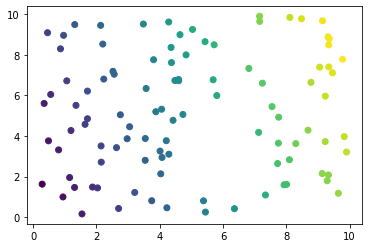

In [3]:
x=df.values[:, 0:2]
y=df.values[:,2]
plt.scatter(x[:, 0], x[:, 1],c=y)
plt.show() 

In [4]:
# training model with leave-one-out
# returns mean, std of testing loss
def leaveOneTrain(x, y):
    error = []
    for i in range(len(x)):
        model = LinearRegression()
        xt, yt = np.array(x[i]), np.array(y[i])
        xt = xt.reshape(1, -1)
        xi = np.concatenate((x[:i], x[i+1:]))
        yi = np.concatenate((y[:i], y[i+1:]))
        model.fit(xi,yi)
        error.append(np.square(np.subtract(yt,model.predict(xt)[0])))

    return np.mean(error)

In [5]:
# offline training;
# evaluation with leave-one-out
offlineLoss = []
for i in range(10):
    offlineLoss.append(leaveOneTrain(x, y))
offlineMean, offlineStd = np.mean(offlineLoss), np.std(offlineLoss)
print(offlineMean, offlineStd)

0.02194103833033511 3.469446951953614e-18


In [6]:
# split data for online learning
def getSplitData(x, y):
    arr = [i for i in range(100)]
    random.shuffle(arr)
    xlist = [x[arr[:50]], x[arr[50:60]], x[arr[60:70]], x[arr[70:80]], x[arr[80:90]], x[arr[90:]]]
    ylist = [y[arr[:50]], y[arr[50:60]], y[arr[60:70]], y[arr[70:80]], y[arr[80:90]], y[arr[90:]]]
    return xlist, ylist

In [7]:
# online learning 
# returns step wise loss and cumulative loss
def onlineTrain(x, y):
    xlist, ylist = getSplitData(x, y)
    x0, y0 = np.copy(xlist[0]), np.copy(ylist[0])
    mean = leaveOneTrain(x0, y0)
    # error = sum error, mse = mean error
    error, mseList = [], []
    mseList.append(mean)
    error.append(mean*len(x0))
    model = LinearRegression()
    model.fit(x0, y0) # train with initial dataset
    for i in range(1,6):
        # evaluate on new samples
        pred = model.predict(xlist[i])
        mse = mean_squared_error(y_true=ylist[i], y_pred=pred)
        mseList.append(mse)
        error.append(mse*len(pred))
        # merge and train again
        x0 = np.concatenate((x0, xlist[i]),axis=0)
        y0 = np.concatenate((y0, ylist[i]),axis=0)
        model = LinearRegression()
        model.fit(x0, y0)
    return sum(error), mseList

In [8]:
# 10 simulation onlineLearning
regret = []
onlineError = []
random.seed(0) #for reproduction; comment for random in different trial
for i in range(10):
    reg, simulationMSE = onlineTrain(x,y)
    onlineError.append(simulationMSE)
    # regret = online - offline
    regret.append(reg - offlineMean*100)

#compute average and std for each round across 10 simulation
onlineTrans = np.transpose(np.array(onlineError))
onlineMean = [np.mean(i) for i in onlineTrans]
onlineStd = [np.std(i) for i in onlineTrans]

Text(0.5, 1.0, 'Figure 1a')

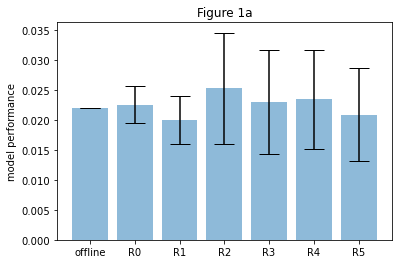

In [9]:
fig, ax = plt.subplots()
labels = ["offline", "R0", "R1", "R2", "R3", "R4", "R5"]
yx = [offlineMean]+onlineMean
ystd = [offlineStd]+onlineStd
ax.bar(labels, yx, yerr=ystd, align='center', alpha=0.5,  ecolor='black',capsize=10)
ax.set_ylabel('model performance')
ax.set_title('Figure 1a')

Text(0.5, 1.0, 'Figure 1b')

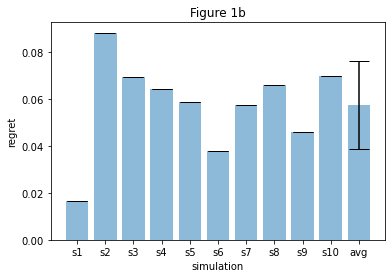

In [10]:
fig, ax = plt.subplots()
labels = ["s"+str(i+1) for i in range(len(regret))]
labels.append("avg")
ystd = [0 for i in range(len(regret))]
plotReg = regret+[np.mean(regret)]
ystd.append(np.std(regret))
ax.bar(labels, plotReg, yerr = ystd, align='center', alpha=0.5,  ecolor='black',capsize=10)
ax.set_xlabel("simulation")
ax.set_ylabel('regret')
ax.set_title('Figure 1b')